In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from delaunay_triangulation_2d import Delaunay2D
import matplotlib.collections

In [13]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])

In [14]:
tri = Delaunay(points)

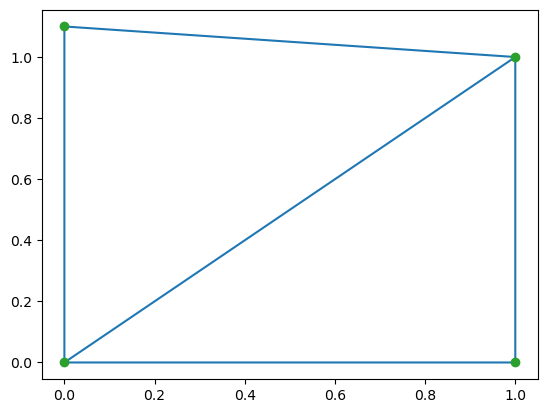

In [15]:
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

In [16]:
# Generate random points in a square of size radius
num_points = 50
radius = 100
points = radius * np.random.random((num_points, 2))
print("Points:\n", points)
print(
    "BBox Min:", np.amin(points, axis=0), "Bbox Max: ", np.amax(points, axis=0)
)

Points:
 [[47.60852501 35.88759181]
 [21.89149636 62.35799165]
 [14.23296109 82.99635376]
 [92.3230692  67.42156111]
 [11.7329539  77.32541105]
 [12.51760687 72.22514878]
 [58.98647801 19.37404487]
 [ 0.50568867  8.24968983]
 [15.42120848 90.9104858 ]
 [38.16273707 34.63171318]
 [75.12315805 73.03491985]
 [92.4101735  89.35590328]
 [34.34182406 73.6013674 ]
 [23.78710778 42.90190047]
 [68.89440769 88.30791339]
 [99.40422865  3.12936279]
 [ 6.62147799 75.21969232]
 [17.82166438 72.18098475]
 [34.34136681 10.12897297]
 [45.6652643  65.97312745]
 [30.5411618  27.01731082]
 [32.09058773  9.52178574]
 [26.13304075 67.04012661]
 [66.51863691  5.56451817]
 [86.45325227 71.26923374]
 [93.52062066 19.86925543]
 [63.27625735 68.76099159]
 [91.90153769 39.43393009]
 [30.12570381 64.45740069]
 [97.68350599 28.61022373]
 [44.00374344 58.14901882]
 [46.69263664 60.68292912]
 [99.21235848 76.90559174]
 [23.68192908 71.57694629]
 [12.18928309 86.7211663 ]
 [40.42401164  3.47092513]
 [20.13509463 76.58

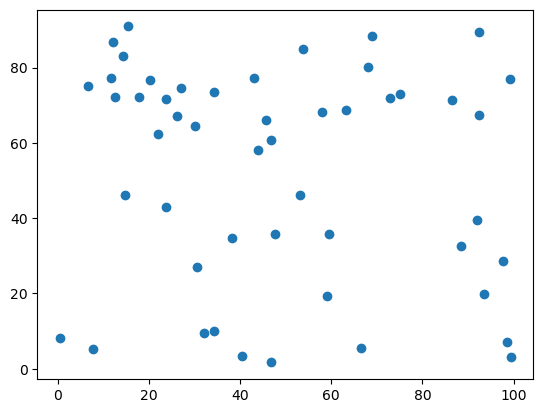

In [17]:
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

In [18]:
tri = Delaunay(points)

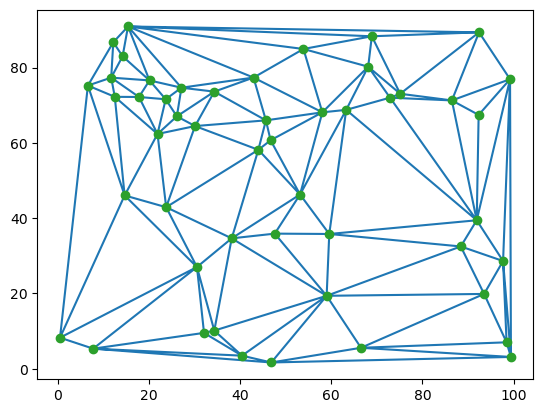

In [19]:
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

In [20]:
center = np.mean(points, axis = 0)
dt = Delaunay2D(center, 50 * radius)

for p in points:
    dt.add_point(p)

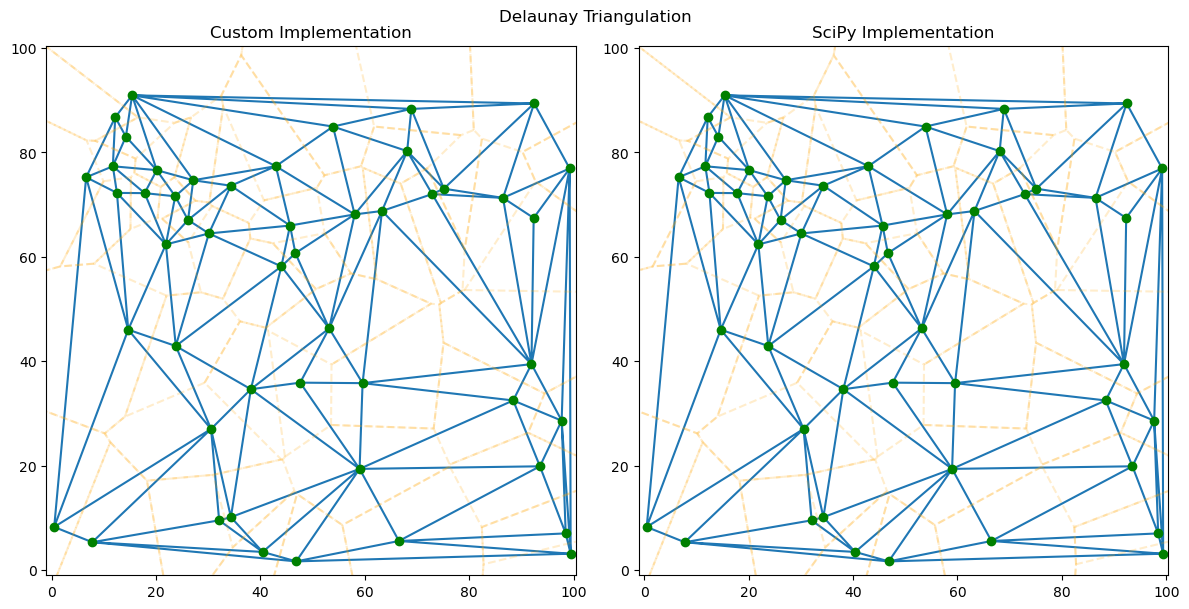

In [21]:
# Set the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed

# Plot for Custom Delaunay Triangulation on the left
cx, cy = zip(*points)
dt_tris = dt.export_triangles()
ax[0].triplot(matplotlib.tri.Triangulation(cx, cy, dt_tris), "-")
vc, vr = dt.export_voronoi_regions()

for r in vr:
    polygon = [vc[i] for i in vr[r]]  # build polygon for each region
    ax[0].plot(*zip(*polygon), "--", color="orange", alpha=0.2)
    ax[1].plot(*zip(*polygon), "--", color="orange", alpha=0.2)

ax[0].scatter(cx, cy, color='green')
ax[0].set_title("Custom Implementation")
ax[0].margins(0.1)
ax[0].set_aspect('equal')
ax[0].axis([-1, np.max(points) + 1, -1, np.max(points) + 1])

# Plot for SciPy Delaunay Triangulation on the right
ax[1].triplot(points[:, 0], points[:, 1], tri.simplices)
ax[1].plot(points[:, 0], points[:, 1], 'o', color='green')
ax[1].set_title("SciPy Implementation")
ax[1].margins(0.1)
ax[1].set_aspect('equal')
ax[1].axis([-1, np.max(points) + 1, -1, np.max(points) + 1])

# Setting a title for the whole figure instead of individual plots
fig.suptitle("Delaunay Triangulation")

plt.tight_layout()
plt.show()